# Pandas Data Reader Demo

### Loading Libraries

In [12]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd
import pandas_datareader.data as web

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Warnings
import warnings

# File Path
import gzip
from pathlib import Path
from urllib.request import urlretrieve
from urllib.parse import urljoin

# Date & Time
from time import time
from datetime import datetime
from datetime import timedelta

# Collections
from collections import namedtuple, Counter, defaultdict

# Operating System
import os
import shutil
from struct import unpack

# Notebook Optimization
from tqdm import tqdm

In [14]:
import mplfinance as mpf

import yfinance as yf

### Download HTML Table with SP500 Constituents

In [5]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

sp500_constituents = pd.read_html(sp_url, header=0)[0]

In [6]:
sp500_constituents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [7]:
sp500_constituents.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


### `pandas-datareader` for Market Data

#### Yahoo Finance

In [16]:
start = '2014'
end = datetime(2017, 5, 24)

yahoo= web.DataReader('FB', 'yahoo', start=start, end=end)
yahoo.info()

In [18]:
# Date
start = '2014-01-01'
end = datetime(2017, 5, 24)

# Loading Historical Facebook (FB) - Now META Data 
df = yf.download('META', start=start, end=end)

print(df.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           META       META       META       META      META
Date                                                            
2014-01-02  54.453362  54.960971  53.935800  54.572801  43195500
2014-01-03  54.304070  55.388957  54.274208  54.761911  38246200
2014-01-06  56.931679  56.991395  53.796454  54.164717  68852600
2014-01-07  57.648300  58.275346  56.951587  57.429335  77207400
2014-01-08  57.956852  58.136008  56.961543  57.329806  56682400


In [20]:
# mpf.plot(yahoo.drop('Adj Close', axis=1), type='candle')
# plt.tight_layout()

#### IEX

In [23]:
IEX_API_KEY=os.getenv('IEX_API_KEY')

In [26]:
start = datetime(2015, 2, 9)
# end = datetime(2017, 5, 24)

iex = web.DataReader('META', 'iex', start, api_key=IEX_API_KEY)
iex.info()

In [27]:
iex.tail()

In [28]:
sns.set_style('whitegrid')

iex.close.plot(figsize=(14, 5))
sns.despine()

#### Book Data

In [31]:
book = web.get_iex_book('AAPL')

In [32]:
list(book.keys())

In [33]:
orders = pd.concat([pd.DataFrame(book[side]).assign(side=side) for side in ['bids', 'asks']])
orders.head()

In [34]:
for key in book.keys():
    try:
        print(f'\n{key}')
        print(pd.DataFrame(book[key]))
    except:
        print(book[key])

In [35]:
pd.DataFrame(book['trades']).head()

#### Quandl

In [41]:
symbol = 'META.US'

quandl = web.DataReader(symbol, 'quandl', '2015-01-01')
quandl.info()

### FRED

In [38]:
start = datetime(2010, 1, 1)

end = datetime(2013, 1, 27)

gdp = web.DataReader('GDP', 'fred', start, end)

gdp.info()

In [42]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)
inflation.info()

### Fama/French

In [43]:
from pandas_datareader.famafrench import get_available_datasets
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [44]:
ds = web.DataReader('5_Industry_Portfolios', 'famafrench')
print(ds['DESCR'])

5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 202412 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2024 Eugene F. Fama and Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (58 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (58 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 5 cols)
  4 : Number of Firms in Portfolios (58 rows x 5 cols)
  5 : Average Firm Size (58 rows x 5 cols)
  6 : Sum of BE / Sum of ME (5 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (5 rows x 5 cols)


/var/folders/m3/3_zd43kn4nn3q52cpx_b38g00000gn/T/ipykernel_8387/3709057983.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ds = web.DataReader('5_Industry_Portfolios', 'famafrench')
/var/folders/m3/3_zd43kn4nn3q52cpx_b38g00000gn/T/ipykernel_8387/3709057983.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ds = web.DataReader('5_Industry_Portfolios', 'famafrench')
/var/folders/m3/3_zd43kn4nn3q52cpx_b38g00000gn/T/ipykernel_8387/3709057983.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ds = web.DataReader('5_Industry_Port

#### World Bank

In [45]:
from pandas_datareader import wb
gdp_variables = wb.search('gdp.*capita.*const')
gdp_variables.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
11160,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
11162,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
11164,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
11165,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [46]:
wb_data = wb.download(indicator='NY.GDP.PCAP.KD', 
                      country=['US', 'CA', 'MX'], 
                      start=1990, 
                      end=2019)
wb_data.head()

/var/folders/m3/3_zd43kn4nn3q52cpx_b38g00000gn/T/ipykernel_8387/873529061.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  wb_data = wb.download(indicator='NY.GDP.PCAP.KD',


NY.GDP.PCAP.KD
country year                
Canada  2019    45100.291490
        2018    44907.343684
        2017    44339.388669
        2016    43551.342602
        2015    43594.194105

#### OECD

In [48]:
df = web.DataReader('TUD', 'oecd', start='2010', end='2019')
df[['Japan', 'United States']]

#### Stooq

In [49]:
index_url = 'https://stooq.com/t/'

ix = pd.read_html(index_url)
len(ix)

47

In [50]:
sp500_stooq = web.DataReader('^SPX', 'stooq')
sp500_stooq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-03-26 to 2020-03-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   float64
dtypes: float64(5)
memory usage: 58.8 KB


In [51]:
sp500_stooq.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-26,5771.66,5783.62,5694.41,5712.20,2.881241e+09
2025-03-25,5775.96,5786.95,5760.42,5776.65,2.701964e+09
2025-03-24,5718.08,5775.14,5718.08,5767.57,3.047868e+09
2025-03-21,5630.73,5670.84,5603.10,5667.56,6.488692e+09
2025-03-20,5646.92,5711.15,5632.33,5662.89,2.850150e+09


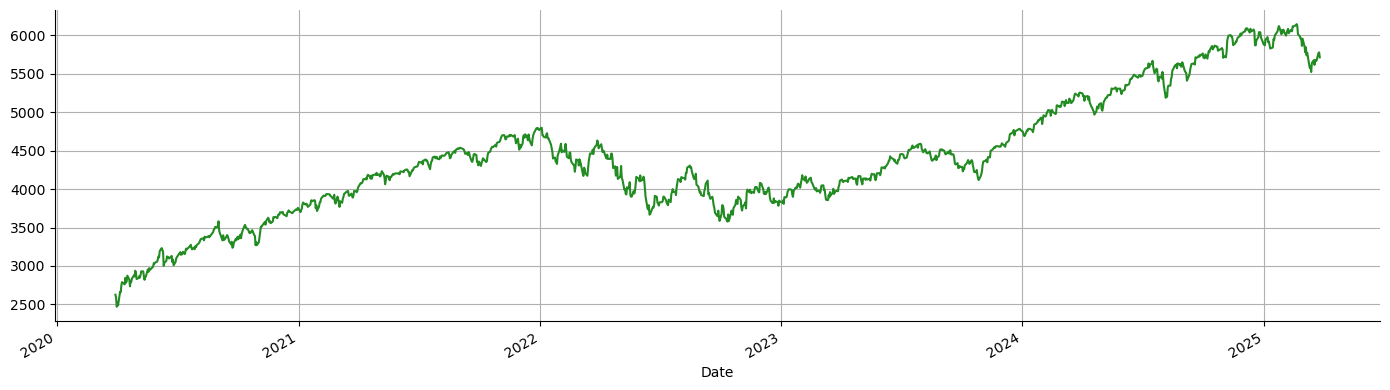

In [54]:
sp500_stooq.Close.plot(figsize=(14,4), color='forestgreen')
sns.despine()

plt.tight_layout()
plt.grid(True)

#### NASDAQ Symbols

In [56]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols

# symbols = get_nasdaq_symbols()
# symbols.info()

#### Tiingo

In [58]:
df = web.get_data_tiingo('GOOG', api_key=os.getenv('TIINGO_API_KEY'))

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 854 entries, 2014-01-02 to 2017-05-23
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, META)   854 non-null    float64
 1   (High, META)    854 non-null    float64
 2   (Low, META)     854 non-null    float64
 3   (Open, META)    854 non-null    float64
 4   (Volume, META)  854 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 40.0 KB
